<a href="https://colab.research.google.com/github/Rag-gy/path-to-ML/blob/main/Tensorflow_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Simple Linear Regression

Dataset : https://www.kaggle.com/andonians/random-linear-regression

In [ ]:
# Importing data
train_df = pd.read_csv('/content/drive/MyDrive/Coding/Datasets/Linear Regression/train.csv')
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


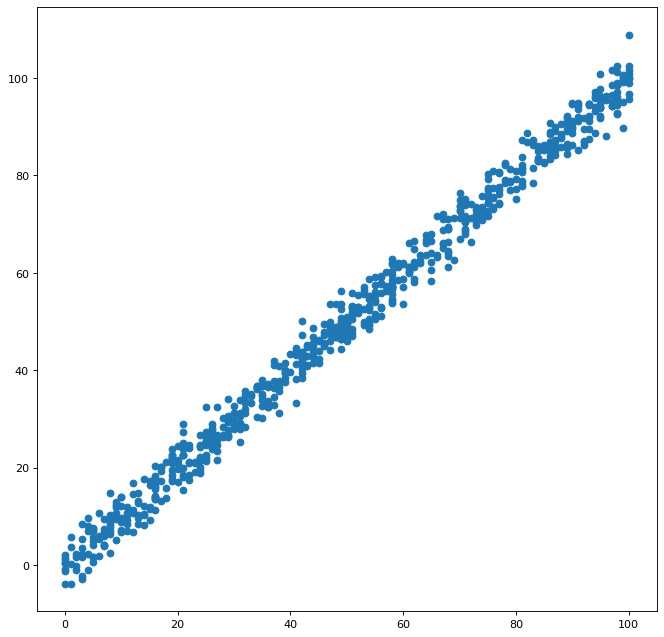

In [ ]:
plt.figure(figsize=(10, 10), dpi=80);
plt.scatter(train_df['x'],train_df['y']);

In [ ]:
# Count of NaN values in dataframe.
train_df.isna().sum()

x    0
y    1
dtype: int64

In [ ]:
# Important note. Always dropna on the dataframe.
train_df = train_df.dropna()

In [ ]:
# NOTE: Always reshape the inputs as (Samples,number of input attributes,1)
X_train = np.array(train_df['x']).reshape(-1,1,1)
Y_train = np.array(train_df['y']).reshape(-1,1,1)


In [ ]:
# Creating the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))  # (N,) is a scaler of size N. N represents the number of input attributes.
model.add(tf.keras.layers.Dense(1))   # Number of output attributes.


# Compiling the model

model.compile(
              loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-4),
              metrics = ['mae','mse']
              )

# Fitting the model
history = model.fit(X_train,Y_train,epochs = 1000,batch_size=10)

# Visualizing the Loss vs Epoch Curve
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
70/70 [==============================] - 1s 3ms/step - loss: 3.0482 - mae: 3.0482 - mse: 16.0400
Epoch 2/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2359 - mae: 2.2359 - mse: 7.9151
Epoch 3/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2340 - mae: 2.2340 - mse: 7.8919
Epoch 4/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2375 - mae: 2.2375 - mse: 7.9411
Epoch 5/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2332 - mae: 2.2332 - mse: 7.8830
Epoch 6/1000
70/70 [==============================] - 0s 4ms/step - loss: 2.2341 - mae: 2.2341 - mse: 7.9775
Epoch 7/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2368 - mae: 2.2368 - mse: 7.9134
Epoch 8/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2383 - mae: 2.2383 - mse: 7.9319
Epoch 9/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2362 - mae: 2.2362 - mse: 7.8880
Epoch 10/1000
70/7

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Coding/Datasets/Linear Regression/test.csv')
test_df = test_df.dropna()

X_test = np.array(test_df['x']).reshape(-1,1,1)
Y_test = np.array(test_df['y']).reshape(-1,1,1)

Y_pred = model.predict(X_test).round()
Y_pred[6] , Y_test[6]

(array([62.], dtype=float32), array([[58.87465933]]))

# Multiple Linear Regression


In [ ]:
x_train_df = pd.read_csv('/content/drive/MyDrive/Coding/Datasets/Multiple Linear Regression/insurance.csv')
x_train_df = x_train_df.dropna()
x_train_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
x_train = np.array(x_train_df[['age','bmi','children']][:int(1338*0.8)]).reshape(-1,3,1)
y_train = np.array(x_train_df['charges'][:int(1338*0.8)]).reshape(-1,1,1)

# Scale our output as it is very big. b/w (0,1)
scale = np.size(y_train)
y_train = y_train/scale

x_test = np.array(x_train_df[['age','bmi','children']][int(1338*0.8):]).reshape(-1,3,1)
y_test = np.array(x_train_df['charges'][int(1338*0.8):]).reshape(-1,1,1)

Epoch 1/100
107/107 [==============================] - 1s 3ms/step - loss: 9.2151 - mse: 193.1905
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 7.9699 - mse: 166.8629
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 7.0008 - mse: 153.0973
Epoch 4/100
107/107 [==============================] - 1s 5ms/step - loss: 6.3356 - mse: 145.7025
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 6.2313 - mse: 143.3814
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 6.2211 - mse: 143.3884
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 6.2272 - mse: 142.9590
Epoch 8/100
107/107 [==============================] - 0s 2ms/step - loss: 6.2239 - mse: 143.7602
Epoch 9/100
107/107 [==============================] - 0s 3ms/step - loss: 6.2258 - mse: 143.6071
Epoch 10/100
107/107 [==============================] - 0s 2ms/step - loss: 6.2115 - mse: 143.0349
Epoch 11/100
107/10

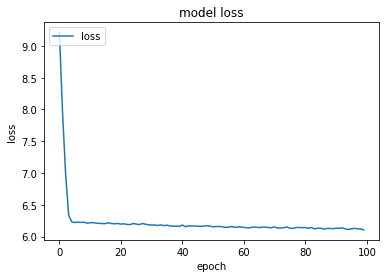

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape = (3,)))
model.add(tf.keras.layers.Dense(3,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(
              loss= tf.keras.losses.mae,                                  # Using MSE leads to exploding gradient problem for higher lr.
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),  # Adam works better for every learning rate. 
              metrics = ['mse']
              )

history = model.fit(x_train,y_train,epochs=100,batch_size = 10,verbose = 1)
# Visualizing the Loss vs Epoch Curve
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(x_test).round()
# Sale back our prediction
Y_pred[6] * scale , y_test[6]

(array([8560.], dtype=float32), array([[8551.347]]))

# Logistic Regression with multiple attributes.

i.e Binary Classification.

In [ ]:
x_train_df = pd.read_csv('/content/drive/MyDrive/Coding/Datasets/Logistic Regression/Social_Network_Ads.csv')
x_train_df = x_train_df.dropna()
x_train_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
x_train = np.array(x_train_df[['Age','EstimatedSalary']][:int(400*0.8)]).reshape(-1,2,1)
y_train = np.array(x_train_df['Purchased'][:int(400*0.8)]).reshape(-1,1,1)

x_test = np.array(x_train_df[['Age','EstimatedSalary']][int(400*0.8):]).reshape(-1,2,1)
y_test = np.array(x_train_df['Purchased'][int(400*0.8):]).reshape(-1,1,1)
x_train

array([[[    19],
        [ 19000]],

       [[    35],
        [ 20000]],

       [[    26],
        [ 43000]],

       [[    27],
        [ 57000]],

       [[    19],
        [ 76000]],

       [[    27],
        [ 58000]],

       [[    27],
        [ 84000]],

       [[    32],
        [150000]],

       [[    25],
        [ 33000]],

       [[    35],
        [ 65000]],

       [[    26],
        [ 80000]],

       [[    26],
        [ 52000]],

       [[    20],
        [ 86000]],

       [[    32],
        [ 18000]],

       [[    18],
        [ 82000]],

       [[    29],
        [ 80000]],

       [[    47],
        [ 25000]],

       [[    45],
        [ 26000]],

       [[    46],
        [ 28000]],

       [[    48],
        [ 29000]],

       [[    45],
        [ 22000]],

       [[    47],
        [ 49000]],

       [[    48],
        [ 41000]],

       [[    45],
        [ 22000]],

       [[    46],
        [ 23000]],

       [[    47],
        [ 20000]],

       [[   

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 13563.5488 - accuracy: 0.2875
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 10034.4814 - accuracy: 0.2875
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 6511.0728 - accuracy: 0.2875
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 2927.8540 - accuracy: 0.2875
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 346.9225 - accuracy: 0.5437
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 30.9527 - accuracy: 0.5719
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 12.0278 - accuracy: 0.6156
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.1937 - accuracy: 0.6562
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 11.0962 - accuracy: 0.6219
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 10.245

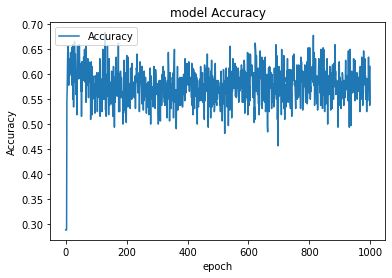

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape = (2,)))
model.add(tf.keras.layers.Dense(2,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(
              loss= tf.keras.losses.binary_crossentropy,                                  
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),  
              metrics = ['accuracy']
              )

history = model.fit(x_train,y_train,epochs=1000,batch_size = 10,verbose = 1)
# Visualizing the Loss vs Epoch Curve
plt.plot(history.history['accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(x_test).round()
Y_pred[24] , y_test[24]

(array([0.], dtype=float32), array([[1]]))

# Multiple Class Classification with Softmax
# MNIST Handwritten Digits

In [ ]:
mnist_digits = tf.keras.datasets.mnist
(x_train , y_train) , (x_test,y_test) = mnist_digits.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
import random
def get_random_img():
  random_num = random.randint(0,60000)
  print(f"Label : {y_train[random_num]}")
  plt.imshow(x_train[random_num],cmap = plt.cm.binary);
  plt.show()

Label : 0


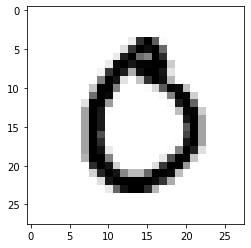

In [ ]:
get_random_img()

In [ ]:
# Normalize data from (0,255) to (0,1)
x_train = x_train / 255
x_test = x_test / 255
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2310 - accuracy: 0.9316
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0961 - accuracy: 0.9704
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9787


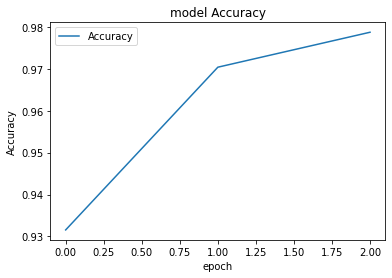

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(
              loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
              )

history = model.fit(x_train,y_train,epochs = 3)

# Visualizing the Loss vs Epoch Curve
plt.plot(history.history['accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy'], loc='upper left')
plt.show()

In [ ]:
def get_random_prediction():
  random_num = random.randint(0,10000)
  print(f"Prediction : {np.argmax(model.predict(x_test)[random_num])}, Actual : {y_test[random_num]}")
  plt.imshow(x_test[random_num]);

Prediction : 6, Actual : 6


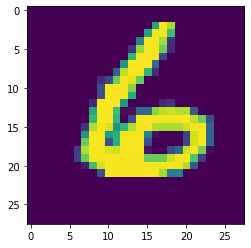

In [ ]:
get_random_prediction()

# Fashion MNIST

In [ ]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(x_train , y_train) , (x_test,y_test) = mnist_fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
classes = [
           'T-shirt/top',
           'Trouser',
           'Pullover',
           'Dress',
           'Coat',
           'Sandal',
           'Shirt',
           'Sneaker',
           'Bag',
           'Ankle boot'
           ]

In [ ]:
import random
def get_random_img():
  random_num = random.randint(0,60000)
  print(f"Label : {classes[y_train[random_num]]}")
  plt.imshow(x_train[random_num],cmap = plt.cm.binary);
  plt.show()

Label : Ankle boot


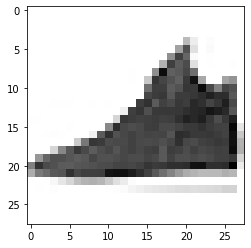

In [ ]:
get_random_img()

In [ ]:
# Normalize data from (0,255) to (0,1)
x_train = x_train / 255
x_test = x_test / 255
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5029 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2700 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2578 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2499 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.242

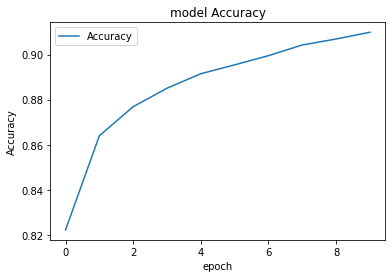

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(
              loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
              )

history = model.fit(x_train,y_train,epochs = 10)

# Visualizing the Loss vs Epoch Curve
plt.plot(history.history['accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy'], loc='upper left')
plt.show()

In [ ]:
def get_random_prediction():
  random_num = random.randint(0,10000)
  print(f"Prediction : {classes[np.argmax(model.predict(x_test)[random_num])]}, Actual : {classes[y_test[random_num]]}")
  plt.imshow(x_test[random_num]);

(9, 9)

Prediction : Pullover, Actual : Coat


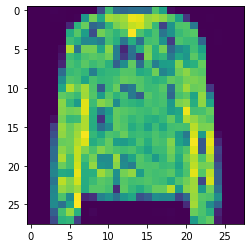

In [ ]:
get_random_prediction()

# Convolutional Neural Networks

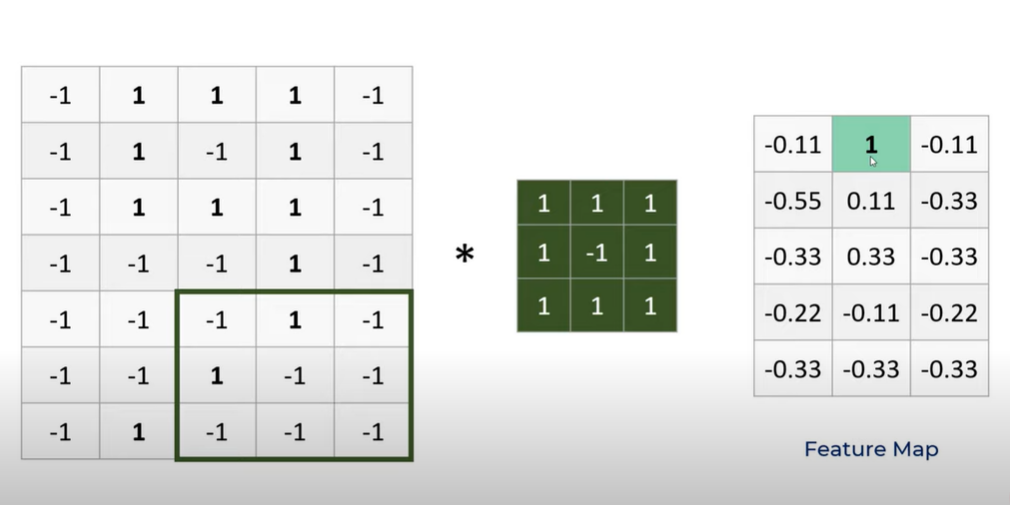

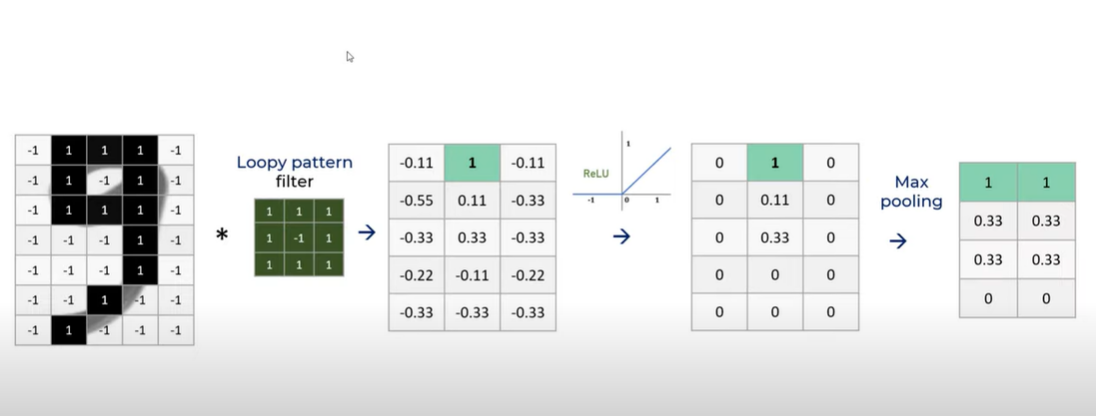

In [ ]:
import tensorflow as tf
(X_train , Y_train) , (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_train.shape

(50000, 32, 32, 3)

In [ ]:
cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),input_shape = (32,32,3), activation = 'relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64))
cnn_model.add(tf.keras.layers.Dense(10,activation = 'softmax'))


cnn_model.compile(
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              )

cnn_model.fit(X_train,Y_train,epochs = 10,batch_size = 16)

Epoch 1/10
3125/3125 [==============================] - 75s 24ms/step - loss: 1.3363 - accuracy: 0.5244
Epoch 2/10
3125/3125 [==============================] - 74s 24ms/step - loss: 1.0239 - accuracy: 0.6400
Epoch 3/10
3125/3125 [==============================] - 75s 24ms/step - loss: 0.9114 - accuracy: 0.6849
Epoch 4/10
3125/3125 [==============================] - 75s 24ms/step - loss: 0.8342 - accuracy: 0.7126
Epoch 5/10
3125/3125 [==============================] - 75s 24ms/step - loss: 0.7846 - accuracy: 0.7292
Epoch 6/10
3125/3125 [==============================] - 75s 24ms/step - loss: 0.7396 - accuracy: 0.7415
Epoch 7/10
3125/3125 [==============================] - 73s 23ms/step - loss: 0.7057 - accuracy: 0.7545
Epoch 8/10
3125/3125 [==============================] - 73s 23ms/step - loss: 0.6772 - accuracy: 0.7640
Epoch 9/10
3125/3125 [==============================] - 72s 23ms/step - loss: 0.6556 - accuracy: 0.7717
Epoch 10/10
3125/3125 [==============================] - 73s 23m

# CIFAR_100

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)  = tf.keras.datasets.cifar100.load_data()
x_train = x_train/255

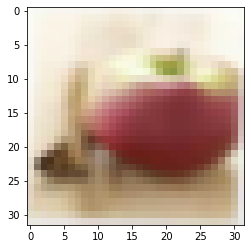

In [ ]:
plt.imshow(x_train[2]);

In [ ]:
cifar_model = tf.keras.Sequential()

cifar_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = (4,4) , input_shape = (32,32,3),activation = 'relu'))
cifar_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cifar_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size = (4,4),activation = 'relu'))
cifar_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cifar_model.add(tf.keras.layers.Flatten())
cifar_model.add(tf.keras.layers.Dense(64,activation = 'relu'))
cifar_model.add(tf.keras.layers.Dense(100,activation = 'softmax'))


cifar_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              )

cifar_model.fit(x_train,y_train,32,10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 67s 53ms/step - loss: 4.0801 - accuracy: 0.0759 - val_loss: 3.6706 - val_accuracy: 0.1344
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 3.4530 - accuracy: 0.1767 - val_loss: 3.3601 - val_accuracy: 0.1883
Epoch 3/10
1250/1250 [==============================] - 69s 55ms/step - loss: 3.1682 - accuracy: 0.2273 - val_loss: 3.1662 - val_accuracy: 0.2279
Epoch 4/10
1250/1250 [==============================] - 67s 54ms/step - loss: 2.9921 - accuracy: 0.2587 - val_loss: 3.0401 - val_accuracy: 0.2598
Epoch 5/10
1250/1250 [==============================] - 68s 54ms/step - loss: 2.8524 - accuracy: 0.2885 - val_loss: 2.9983 - val_accuracy: 0.2612
Epoch 6/10
1250/1250 [==============================] - 68s 54ms/step - loss: 2.7404 - accuracy: 0.3118 - val_loss: 2.9236 - val_accuracy: 0.2880
Epoch 7/10
1250/1250 [==============================] - 67s 54ms/step - loss: 2.6471 - accuracy: 0.3295 - val_loss: 2.8836 -

In [ ]:
x_test = x_test /255


In [ ]:
import numpy as np
predictions = cifar_model.predict(x_test)


(87, 0)

In [ ]:
for i in range(100):
  print(np.argmax(predictions[i]) == y_test[i])

[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[False]
[ True]
[ True]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[ True]
[False]
[ True]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[ True]
[ True]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[ True]
[False]
[False]
[False]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[False]
[ True]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


# Cats vs Dogs


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 

In [ ]:
(x_train , y_train) , (x_test,y_test) = tf.keras.datasets.cats_vs_dogs.load_data()
x_train.shape

AttributeError: ignored

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-03-21 08:08:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 209.85.145.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   142MB/s    in 0.5s    

2022-03-21 08:08:35 (142 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cats_dir

'/tmp/cats_and_dogs_filtered/train/cats'